# DFBA
This section describes how to run dynamic FBA (DFBA) with `sbmlutils`.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sbmlutils
from sbmlutils import dfba
from sbmlutils.dfba import utils

## Simulate DFBA model
To run an existing DFBA model call use `simulate_dfba`.

In [3]:
# get the absolute path to the top model
from sbmlutils.dfba.toy_wholecell import settings as toysettings
from sbmlutils.dfba.toy_wholecell import model_factory as toyfactory
from sbmlutils.dfba.toy_wholecell import simulate as toysimulate

sbml_path = os.path.join(utils.versioned_directory(toysettings.OUT_DIR, toysettings.VERSION), 
                         toysettings.TOP_LOCATION)
print(sbml_path)

# run simulation with the top model
from sbmlutils.dfba.simulator import simulate_dfba
df, dfba_model, dfba_simulator = simulate_dfba(sbml_path, tend=50, dt=5.0)
df

/home/mkoenig/git/sbmlutils/sbmlutils/dfba/toy_wholecell/results/v15/toy_wholecell_top.xml


/home/mkoenig/git/sbmlutils/sbmlutils/dfba/model.py:125 UserWarning: No top level model found.


ValueError: Framework must be defined on either Model/ModelDefinition, but given: None

## Toy example

Create directory: /tmp/tmp9dluia05/v15


ERROR:root:Providing model units as dict is deprecated, use 'ModelUnits' instead.
ERROR:root:Using notes strings is deprecated, use 'Notes' instead.
INFO:root:
------------------------------------------------------------------------------------------------------------------------
/tmp/tmp9dluia05/v15/toy_wholecell_fba.xml
valid                    : TRUE
check time (s)           : 0.009
------------------------------------------------------------------------------------------------------------------------
ERROR:root:Providing model units as dict is deprecated, use 'ModelUnits' instead.
ERROR:root:Using notes strings is deprecated, use 'Notes' instead.
INFO:root:
------------------------------------------------------------------------------------------------------------------------
/tmp/tmp9dluia05/v15/toy_wholecell_bounds.xml
valid                    : TRUE
check time (s)           : 0.011
--------------------------------------------------------------------------------------------------

/tmp/tmp9dluia05/v15/dfba_simulation.xml
/tmp/tmp9dluia05/v15/toy_wholecell_top.xml
--------------------------------------------------------------------------------
ODE integrator settings
--------------------------------------------------------------------------------
<roadrunner.RoadRunner() { 
'this' : 0x642d920
'modelLoaded' : true
'modelName' : toy_wholecell (TOP)
'libSBMLVersion' : LibSBML Version: 5.17.2
'jacobianStepSize' : 1e-05
'conservedMoietyAnalysis' : false
'simulateOptions' : 
< roadrunner.SimulateOptions() 
{ 
'this' : 0x66127e0, 
'reset' : 0,
'structuredResult' : 0,
'copyResult' : 1,
'steps' : 50,
'start' : 0,
'duration' : 5
}>, 
'integrator' : 
< roadrunner.Integrator() >
  name: cvode
  settings:
      relative_tolerance: 0.000001
      absolute_tolerance: 0.000001
                   stiff: true
       maximum_bdf_order: 5
     maximum_adams_order: 12
       maximum_num_steps: 20000
       maximum_time_step: 0
       minimum_time_step: 0
       initial_time_step: 0
 

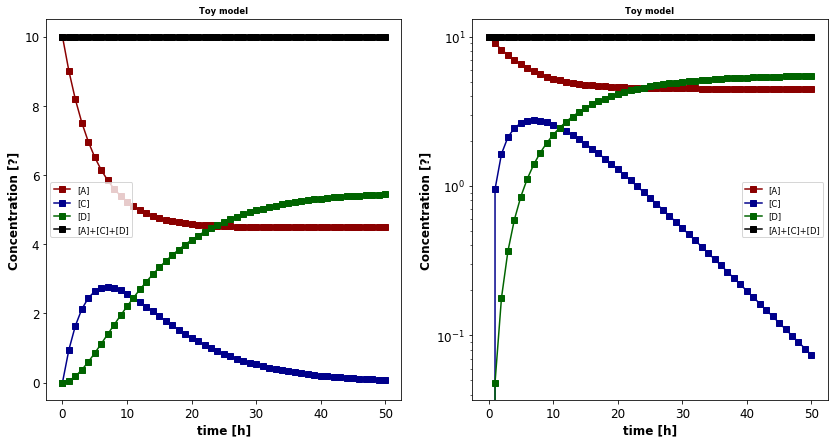

INFO:root:print_species: None


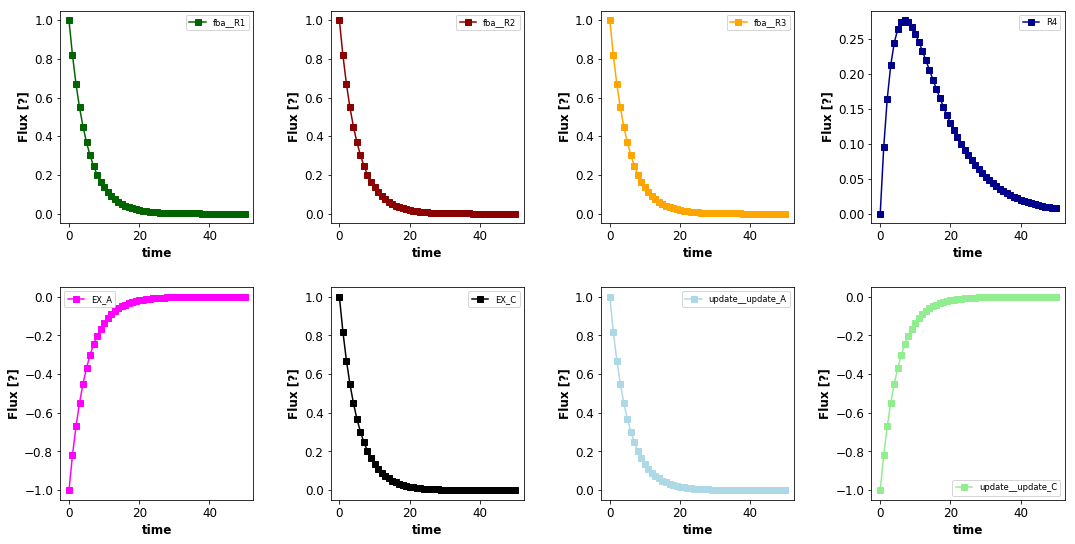

INFO:root:print_fluxes: None


     time        [A]       [C]       [D]  [dummy_S]  [fba__A]  [fba__B1]  \
0.0   0.0  10.000000  0.000000  0.000000        0.0       0.0        0.0   
1.0   1.0   9.000000  0.951639  0.048362        0.0       0.0        0.0   
2.0   2.0   8.181278  1.640202  0.178520        0.0       0.0        0.0   
3.0   3.0   7.510973  2.122005  0.367022        0.0       0.0        0.0   
4.0   4.0   6.962185  2.442313  0.595502        0.0       0.0        0.0   

     [fba__B2]  [fba__C]      EX_A  ...  fba__ub_default  fba__zero  k_R4  \
0.0        0.0       0.0 -1.000000  ...           1000.0        0.0   0.1   
1.0        0.0       0.0 -0.818722  ...           1000.0        0.0   0.1   
2.0        0.0       0.0 -0.670305  ...           1000.0        0.0   0.1   
3.0        0.0       0.0 -0.548788  ...           1000.0        0.0   0.1   
4.0        0.0       0.0 -0.449304  ...           1000.0        0.0   0.1   

        lb_EX_A    lb_EX_C     pEX_A     pEX_C  ub_EX_A  ub_EX_C     ub_R1  
0.0

In [6]:
from sbmlutils.dfba.toy_wholecell import settings as toysettings
from sbmlutils.dfba.toy_wholecell import model_factory as toyfactory
from sbmlutils.dfba.toy_wholecell import simulate as toysimulate

import tempfile
test_dir = tempfile.mkdtemp()

# create the toy model
toyfactory.create_model(test_dir)
# here the files are generated
sbml_path = os.path.join(utils.versioned_directory(test_dir, toysettings.VERSION),
                         toysettings.TOP_LOCATION)
print(sbml_path)
# simulate
dfs = toysimulate.simulate_toy(sbml_path, test_dir, dts=[1.0], figures=False)

toysimulate.print_species(dfs=dfs)
toysimulate.print_fluxes(dfs=dfs)
print(dfs[0].head())

## Diauxic growth

In [ ]:
'''
from sbmlutils.dfba.diauxic_growth import settings as dgsettings
from sbmlutils.dfba.diauxic_growth import model_factory as dgfactory
from sbmlutils.dfba.diauxic_growth import simulate as dgsimulate
from sbmlutils.dfba.diauxic_growth import analyse as dganalyse

import tempfile
test_dir = tempfile.mkdtemp()

# create the model
dgfactory.create_model(test_dir)

# top model file
sbml_path = os.path.join(utils.versioned_directory(test_dir, dgsettings.VERSION),
                         dgsettings.TOP_LOCATION)
print(sbml_path)

# run DFBA
dfs = dgsimulate.simulate_diauxic_growth(sbml_path, test_dir, dts=[0.01], figures=False)

# plot results
dganalyse.print_species(dfs=dfs)
dganalyse.print_fluxes(dfs=dfs)
print(dfs[0].head())
'''